In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import vaderSentiment

In [ ]:
vaderSentiment

In [27]:
analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv('../data/yelp_academic_dataset_review_truncated.csv')

In [66]:
df.count()

business_id    5996993
cool           5996993
date           5996993
funny          5996993
review_id      5996993
stars          5996993
text           5996993
useful         5996993
user_id        5996993
dtype: int64

In [65]:
df.dropna(how='any', inplace=True)

In [28]:
df.count()

business_id    1000
cool           1000
date           1000
funny          1000
review_id      1000
stars          1000
text           1000
useful         1000
user_id        1000
dtype: int64

In [29]:
[col for col in df]

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [31]:
for idx, row in df.iterrows():
    df.loc[idx, 'vader'] = analyzer.polarity_scores(row['text'])['compound']

In [32]:
x = df['stars']
y = df['vader']
fit = np.polyfit(x, y, 1)
fit_fx = np.poly1d(fit)

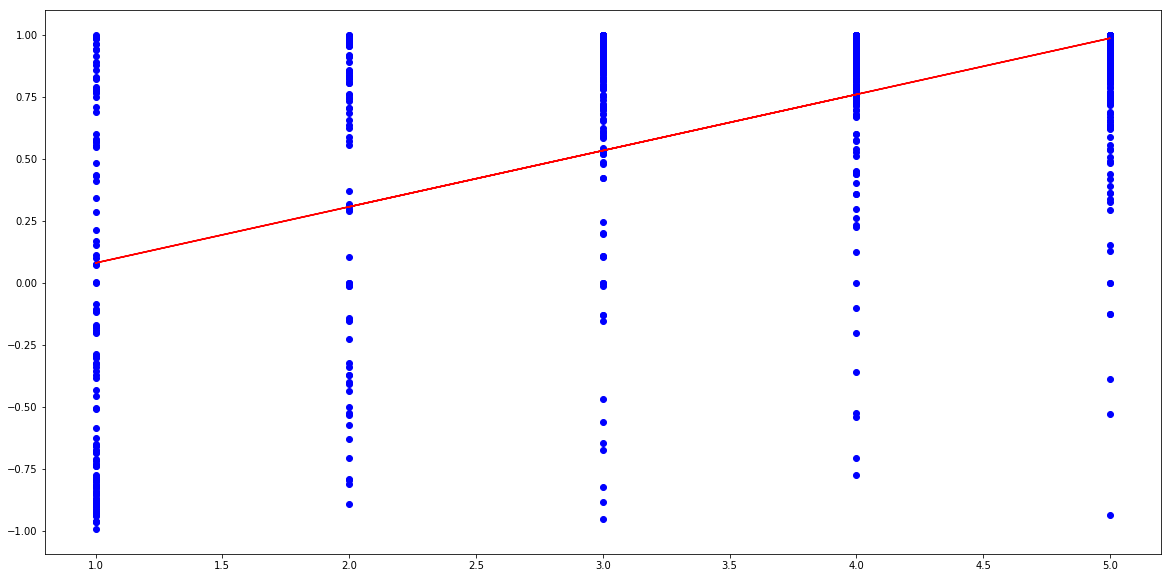

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'bo', x, fit_fx(x), 'r')

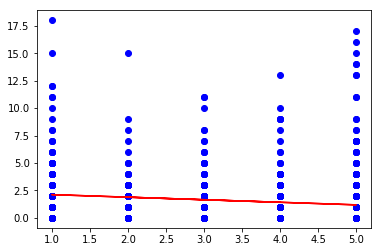

In [18]:
starfunc = np.poly1d(np.polyfit(df['stars'], df['useful'], 1))
plt.plot(df['stars'], df['useful'], 'bo', df['stars'], starfunc(df['stars']), 'r')

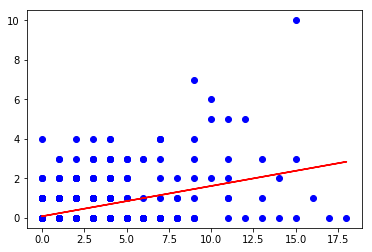

In [16]:
usefunc = np.poly1d(np.polyfit(df['useful'], df['funny'], 1))
plt.plot(df['useful'], df['funny'], 'bo', df['useful'], usefunc(df['useful']), 'r')

Text(0.5, 0, 'Funny')

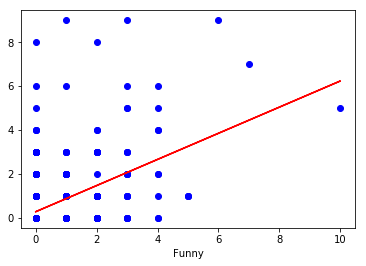

In [17]:
funfunc = np.poly1d(np.polyfit(df['funny'], df['cool'], 1))
plt.plot(df['funny'], df['cool'], 'bo', df['funny'], funfunc(df['funny']), 'r')
plt.xlabel('Funny')